# Gameday
> Simulates the games across a day of volleyball

In [ ]:
#| default_exp gameday

In [ ]:
#| export
from nbdev.showdoc import *
from nbdev import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fastcore.basics import patch
from vballtime.vball_set import VballSet
from vballtime.vball_game import VballGame


An example timetable for a gameday of volleyball looks like the below:


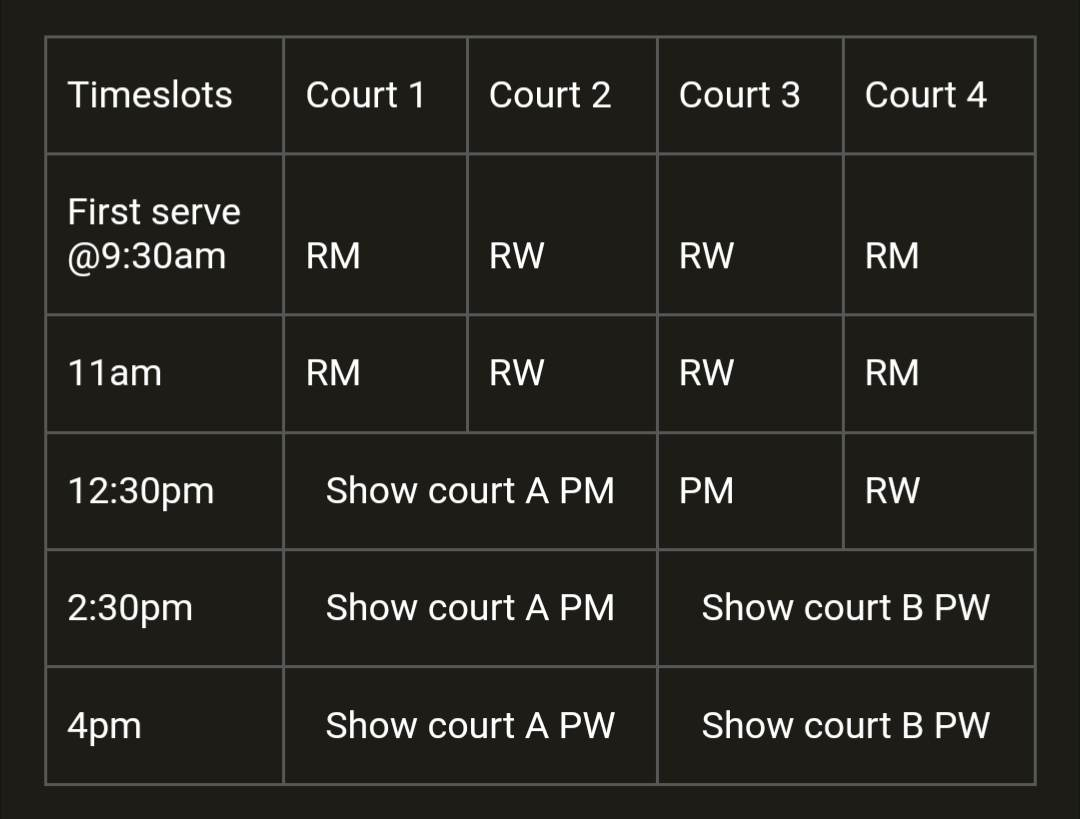

```{mermaid}
flowchart LR
  C1(Court1) --> RMS1C1(RM)
  RMS1C1 --> RMS2C1(RM)
  RMS2C2 --> PMS3CA(PM)
  TMaj --> TMin(ANZSCO Sub-Major)
  T --> S(State)
  S --> SMaj(ANZSCO Major)
  SMaj --> SMin(ANZSCO Sub-Major)
  S --> R(IVI Region)
  R --> RMaj(ANZSCO Major)
  RMaj --> Rmin(ANZSCO Sub-Major)
```

In [ ]:
#| export
class VballGame:
    '''
    Creates a game with betwen 1 and 5 sets
    '''
    def __init__(self, 
             div:str): # The division of the set [PM, PW, RM, RW]
        # Set the point variables
        divisions = ["PM", "PW", "RM", "RW"]
        assert div in str(divisions), "Division is not valid must be: PM, PW, RM or RW"
        self.div = div
        self.n_sets = np.random.randint(3, 5 + 1)
        self.sets = []
        self.time = 0
        # TODO turn this into generator?
        for i in range(self.n_sets):
            # Fifth set has less points
            if i == 4: self.sets.append(VballSet(self.div, set_5 = True))
            else: self.sets.append(VballSet(self.div))
            self.time += self.sets[i].get_time()
            
               
        
    def __str__(self): return f"{self.div}{' game with '}{str(self.n_sets)}{' sets that takes '}{int(self.time/60)}{' minutes'}"
    def __repr__(self): return repr(f'VballSet("{self.div}")')

In [ ]:
show_doc(VballGame)

---

[source](https://github.com/Gippers/vballtime/blob/main/vballtime/vball_game.py#L16){target="_blank" style="float:right; font-size:smaller"}

### VballGame

>      VballGame (div:str)

Creates a game with betwen 1 and 5 sets

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| div | str | The division of the set [PM, PW, RM, RW] |

In [ ]:
#| export
@patch
def get_time(self:VballGame, # An function to output time of vball game
           ) -> float: # Returns the time of the set in seconds 
    return self.time

## Testing

## Tests
Include some examples and unit tests below

In [ ]:
pw_game = VballGame("PW")

In [ ]:
pw_game.get_time()

8392.580571350423

In [ ]:
str(pw_game)

'PW game with 5 sets that takes 139 minutes'

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()